# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city +"&appid="+ weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | gap
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | sisimiut
Processing Record 7 of Set 1 | mersing
Processing Record 8 of Set 1 | vrede
Processing Record 9 of Set 1 | kimparana
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | ixtapa
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | okhotsk
Processing Record 17 of Set 1 | cabiraoan
Processing Record 18 of Set 1 | manaure
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 

Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | mazyr
Processing Record 41 of Set 4 | pucallpa
Processing Record 42 of Set 4 | cherskiy
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | pizhanka
Processing Record 45 of Set 4 | mahina
Processing Record 46 of Set 4 | krasnyy chikoy
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | port blair
Processing Record 49 of Set 4 | codrington
Processing Record 0 of Set 5 | bredasdorp
Processing Record 1 of Set 5 | northam
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | puerto suarez
Processing Record 4 of Set 5 | susaki
Processing Record 5 of Set 5 | bereda
Processing Record 6 of Set 5 | magadan
Processing Record 7 of Set 5 | sembakung
Processing Record 8 of Set 5 | gatesville
Processing Record 9 of Set 5 | tuktoyaktuk
Processing Record 10 of Set 5 | linfen
Processing Record 11 of Set 5 | nortelandia
Processing Record 12 of Set 5 | siocon
Processing

City not found. Skipping...
Processing Record 29 of Set 8 | yerbogachen
Processing Record 30 of Set 8 | congonhas
Processing Record 31 of Set 8 | cap-aux-meules
Processing Record 32 of Set 8 | mapiripan
Processing Record 33 of Set 8 | pacific grove
Processing Record 34 of Set 8 | pointe michel
Processing Record 35 of Set 8 | sao filipe
Processing Record 36 of Set 8 | hami
Processing Record 37 of Set 8 | ngaoundere
Processing Record 38 of Set 8 | thap than
Processing Record 39 of Set 8 | blagoveshchenka
Processing Record 40 of Set 8 | nakuru
Processing Record 41 of Set 8 | maningrida
Processing Record 42 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 43 of Set 8 | karachi
Processing Record 44 of Set 8 | avera
Processing Record 45 of Set 8 | nishihara
Processing Record 46 of Set 8 | bonthe
Processing Record 47 of Set 8 | tottori
Processing Record 48 of Set 8 | souillac
Processing Record 49 of Set 8 | melita
Processing Record 0 of Set 9 | veraval
Processing Record 1 of 

Processing Record 16 of Set 12 | pimenta bueno
Processing Record 17 of Set 12 | chum phae
Processing Record 18 of Set 12 | pangnirtung
Processing Record 19 of Set 12 | palmas
Processing Record 20 of Set 12 | musafirkhana
Processing Record 21 of Set 12 | nouadhibou
Processing Record 22 of Set 12 | myanaung
Processing Record 23 of Set 12 | tevaitoa
Processing Record 24 of Set 12 | chumikan
Processing Record 25 of Set 12 | yenotayevka
Processing Record 26 of Set 12 | wenling
Processing Record 27 of Set 12 | oranjemund
Processing Record 28 of Set 12 | celendin
Processing Record 29 of Set 12 | mount isa
Processing Record 30 of Set 12 | sao paulo de olivenca
Processing Record 31 of Set 12 | ilebo
Processing Record 32 of Set 12 | tuatapere
Processing Record 33 of Set 12 | mattru
Processing Record 34 of Set 12 | mirnyy
Processing Record 35 of Set 12 | chulman
Processing Record 36 of Set 12 | kaeo
Processing Record 37 of Set 12 | rorvik
Processing Record 38 of Set 12 | saquisili
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aklavik,68.2191,-135.0107,-39.72,100,28,0.74,CA,1675645847
1,mar del plata,-38.0023,-57.5575,25.46,51,100,5.63,AR,1675646043
2,gap,44.6667,6.0000,-4.54,72,100,1.96,FR,1675646192
3,sisimiut,66.9395,-53.6735,-18.39,93,100,2.53,GL,1675646193
4,mersing,2.4312,103.8405,22.95,94,40,3.09,MY,1675646193


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\msmic\python-api-challenge\Starter_Code\output_data\cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\msmic\python-api-challenge\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aklavik,68.2191,-135.0107,-39.72,100,28,0.74,CA,1675645847
1,mar del plata,-38.0023,-57.5575,25.46,51,100,5.63,AR,1675646043
2,gap,44.6667,6.0000,-4.54,72,100,1.96,FR,1675646192
3,sisimiut,66.9395,-53.6735,-18.39,93,100,2.53,GL,1675646193
4,mersing,2.4312,103.8405,22.95,94,40,3.09,MY,1675646193


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

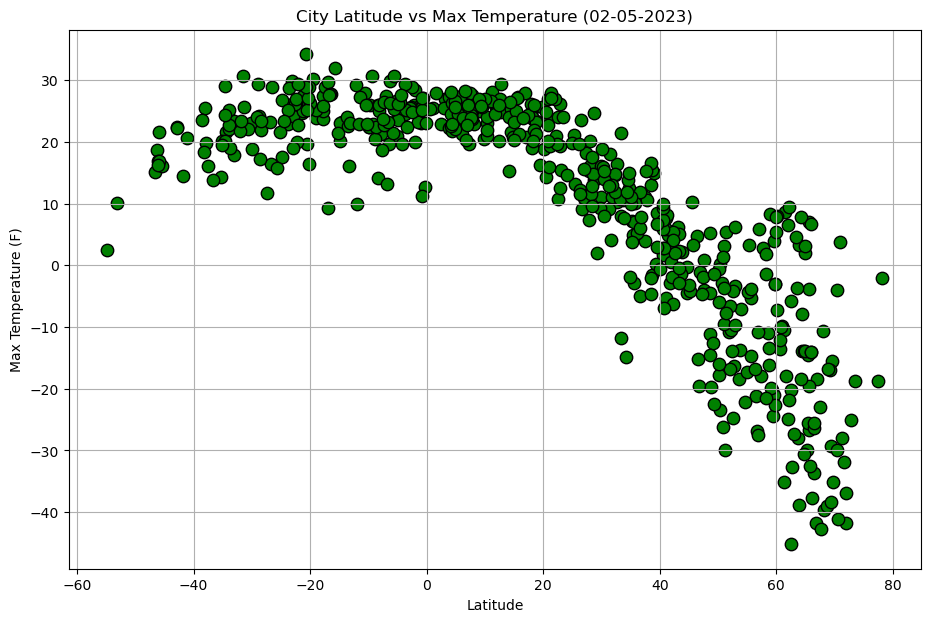

In [36]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots(figsize=(11,7))

ax.scatter(city_data_df["Lat"], city_data_df["Max Temp"],edgecolor="black",facecolor="green",s=80)

# Incorporate the other graph properties
ax.set(title = "City Latitude vs Max Temperature (02-05-2023)",
    ylabel = "Max Temperature (F)",
    xlabel = "Latitude"
    )

ax.grid(which="major",axis="both")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

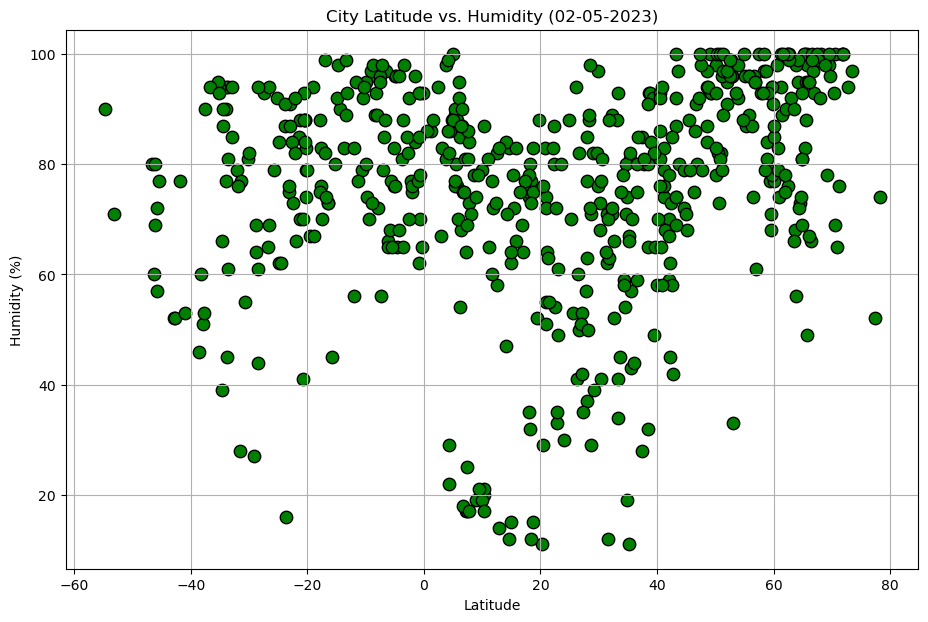

In [38]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots(figsize=(11,7))

ax.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor="black",facecolor="green",s=80)

# Incorporate the other graph properties
ax.set(title= "City Latitude vs. Humidity (02-05-2023)",
       ylabel= "Humidity (%)",
       xlabel="Latitude"
      )
ax.grid(which="major",axis="both")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

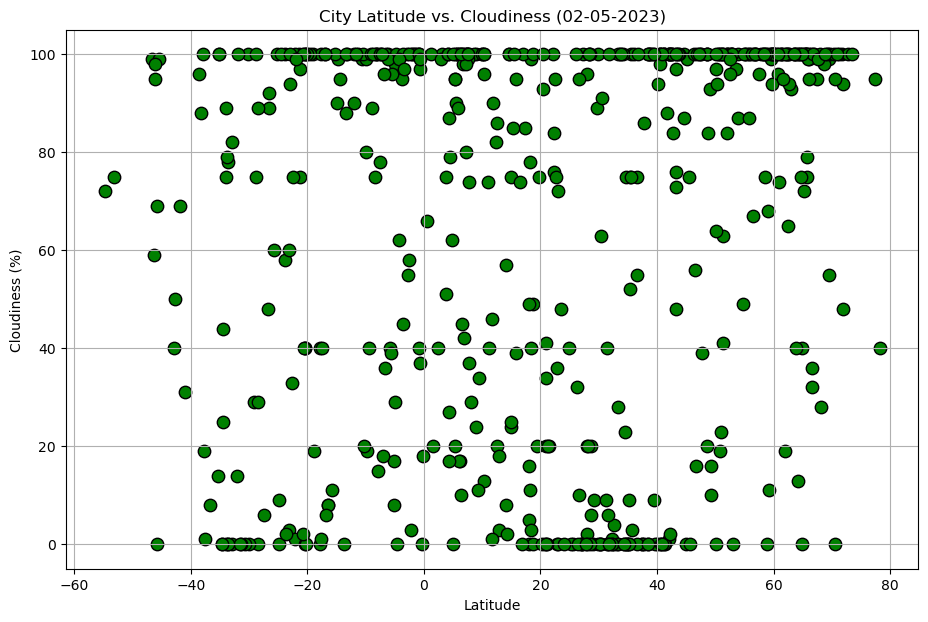

In [39]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots(figsize=(11,7))

ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],edgecolor="black",facecolor="green",s=80)

# Incorporate the other graph properties
ax.set(title= "City Latitude vs. Cloudiness (02-05-2023)",
       ylabel= "Cloudiness (%)",
       xlabel="Latitude"
      )
ax.grid(which="major",axis="both")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

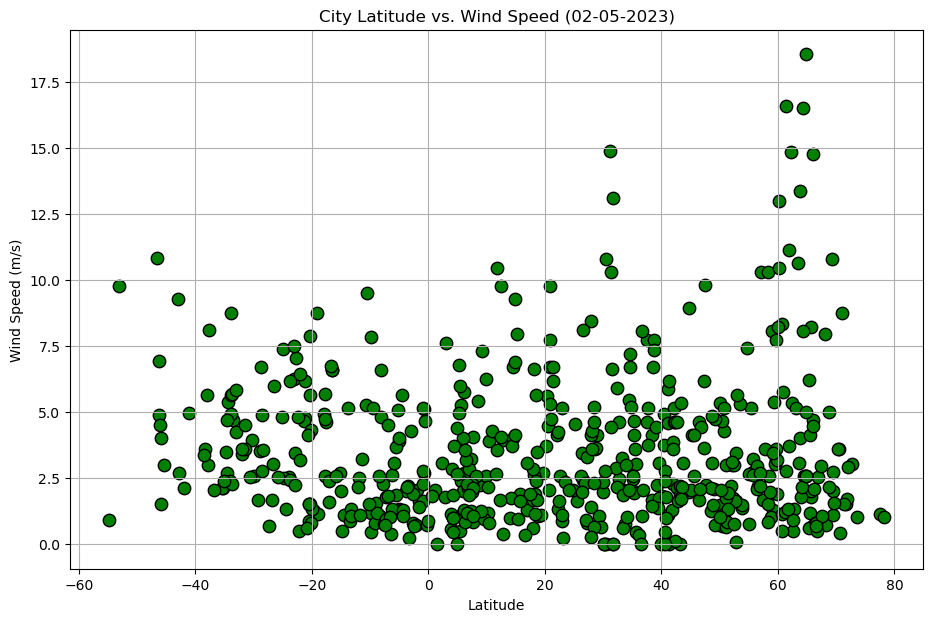

In [40]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots(figsize=(11,7))

ax.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],edgecolor="black",facecolor="green",s=80)

# Incorporate the other graph properties
ax.set(title= "City Latitude vs. Wind Speed (02-05-2023)",
       ylabel= "Wind Speed (m/s)",
       xlabel="Latitude"
      )
ax.grid(which="major",axis="both")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def lin_regress(x,y,x_label,y_label,loc):
    plt_slope,plt_int,plt_r,plt_p,plt_std_err = linregress(x,y)
    
    print(f"The r value is {round(plt_r,2)}")
    fit_values = plt_slope * x + plt_int
    fig,ax = plt.subplots(figsize = (11,7))
    ax.scatter(x,y,edgecolor="black",facecolor="green",s=80)
    ax.plot(x,fit_values)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.annotate((f"y = {str(round(plt_slope,2))}x + {str(round(plt_int,2))}"),loc,fontsize=14,color="red")
    plt.show()

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >=0,:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aklavik,68.2191,-135.0107,-39.72,100,28,0.74,CA,1675645847
2,gap,44.6667,6.0000,-4.54,72,100,1.96,FR,1675646192
3,sisimiut,66.9395,-53.6735,-18.39,93,100,2.53,GL,1675646193
4,mersing,2.4312,103.8405,22.95,94,40,3.09,MY,1675646193
6,kimparana,12.8347,-4.9244,24.79,14,3,3.94,ML,1675646194


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] <0,:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mar del plata,-38.0023,-57.5575,25.46,51,100,5.63,AR,1675646043
5,vrede,-27.4257,29.1659,11.77,93,6,0.70,ZA,1675646194
10,atuona,-9.8000,-139.0333,25.98,74,19,7.84,PF,1675646104
12,alofi,-19.0595,-169.9187,23.94,94,100,8.75,NU,1675646196
16,kaitangata,-46.2817,169.8464,18.62,60,59,6.94,NZ,1675646198


###  Temperature vs. Latitude Linear Regression Plot

The r value is -0.87


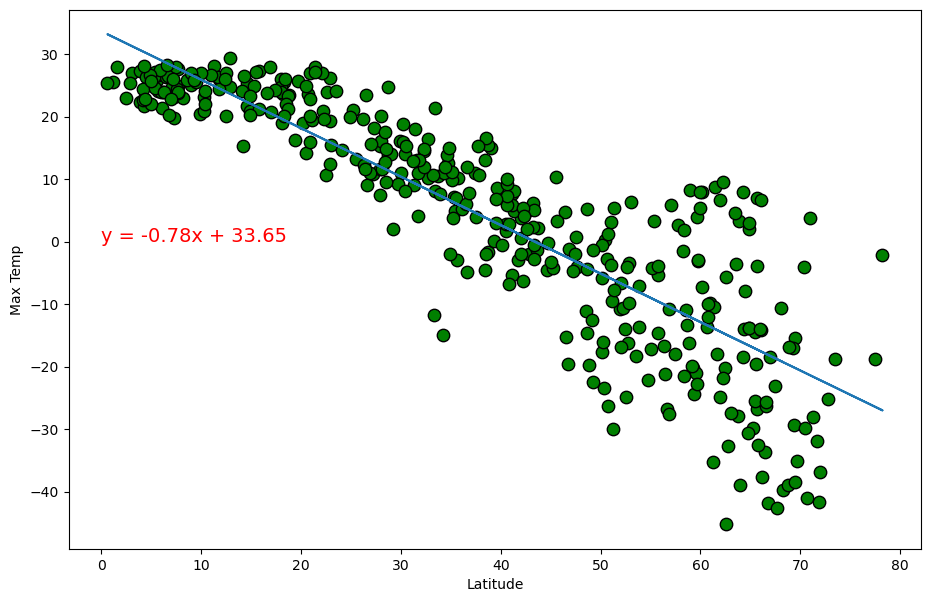

In [47]:
# Linear regression on Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp",(0,0))

The r value is 0.35


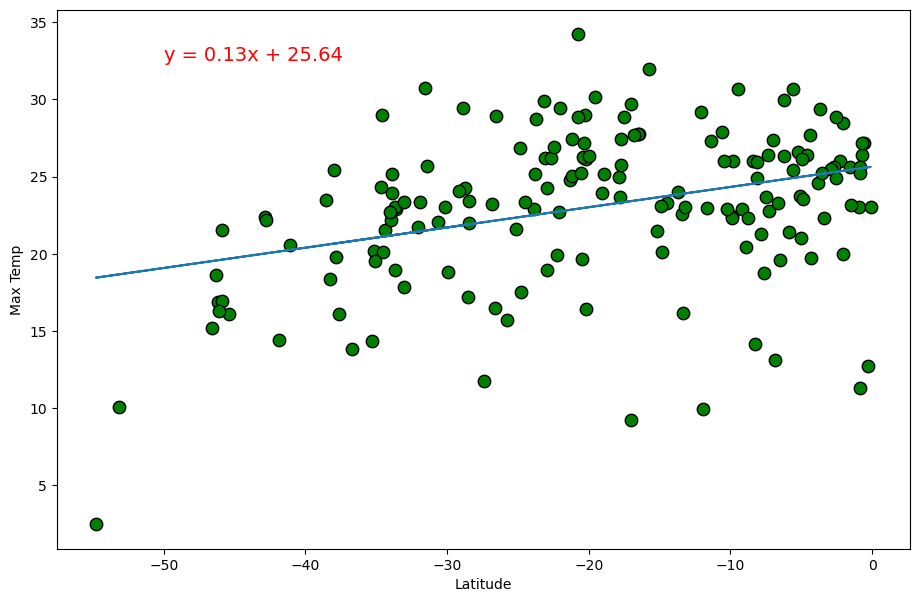

In [49]:
# Linear regression on Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp",(-50,32.5))

**Discussion about the linear relationship:** The data shows a strong negative relationship between latitude and the maximum temperatures for the Northern Hemisphere. In the Southern Hemisphere, there is a somewhat positive relationship between latitude and the maximum temperatures. Indicating that the closer you travel to the equator, where the Latitude is 0, the higher the temperatures.  Although, the regression slope of the Southern Hemisphere is shallower than that of the Northern Hemisphere, where the temperatures get lower the farther you travel away from the  equator, where the Latitude is 0.  Due to the greater relationship between latitude and maximum temperatures in the Northern Hemisphere, the temperature here would be more accurately predicted than that of the Southern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r value is 0.42


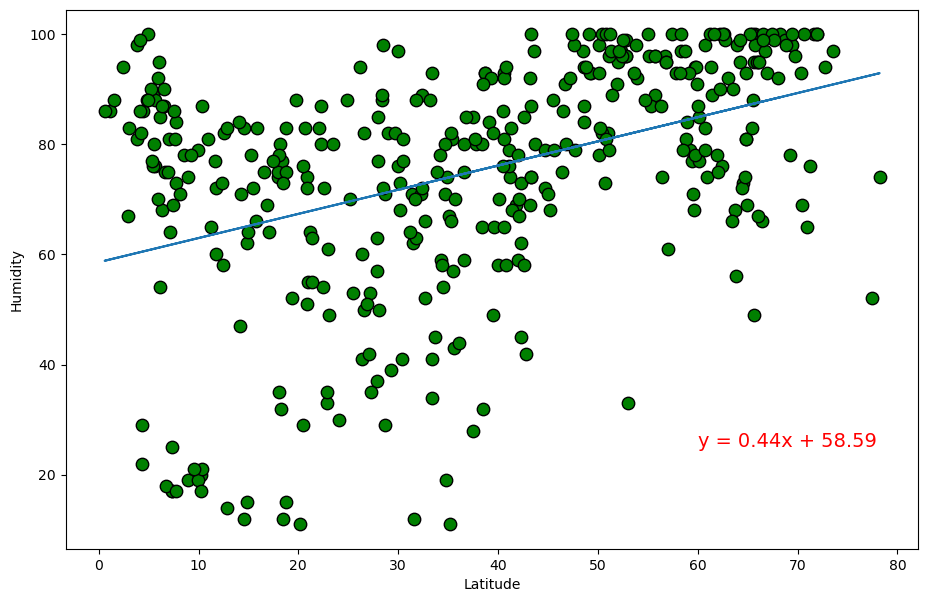

In [50]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity",(60,25))

The r value is 0.27


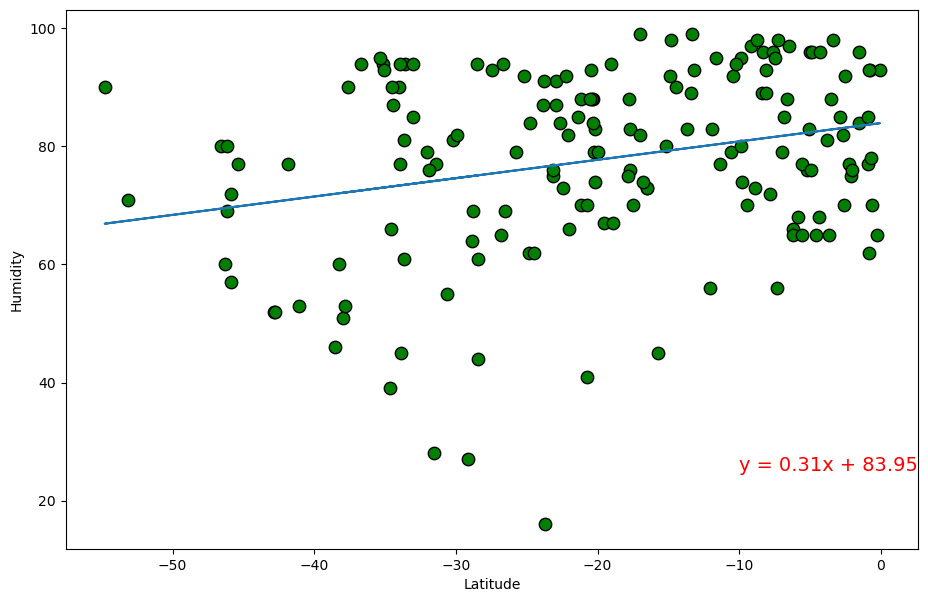

In [51]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity",(-10,25))

**Discussion about the linear relationship:** The Northern Hemisphere shows a strong positive relationship between latitude and humidity, while there is a slightly moderate positive relationship shown in the Southern Hemisphere. The regression line for the Southern Hemisphere reflects a much shallower line than the one shown in the Northern Hemisphere. Meaning, no matter which hemisphere, the latitude gets higher, the humidity will get higher as well. The humidity of the Southern Hemisphere changes at slower rate than that of the Northern Hemisphere. The data also shows that the humidity readings are higher in the area just south of the Equator than that of the area just to the north of the Equator.  

### Cloudiness vs. Latitude Linear Regression Plot

The r value is 0.26


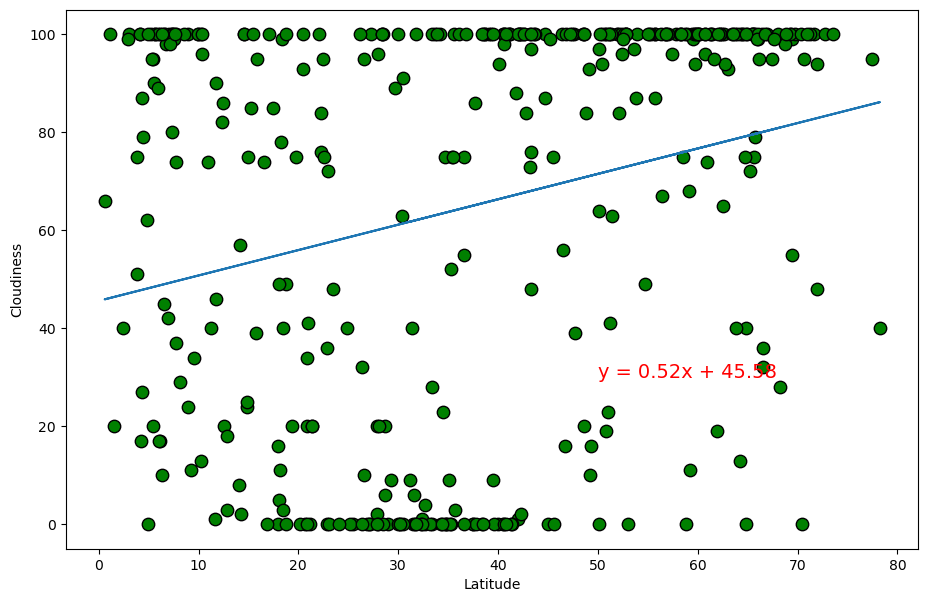

In [52]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness",(50,30))

The r value is 0.19


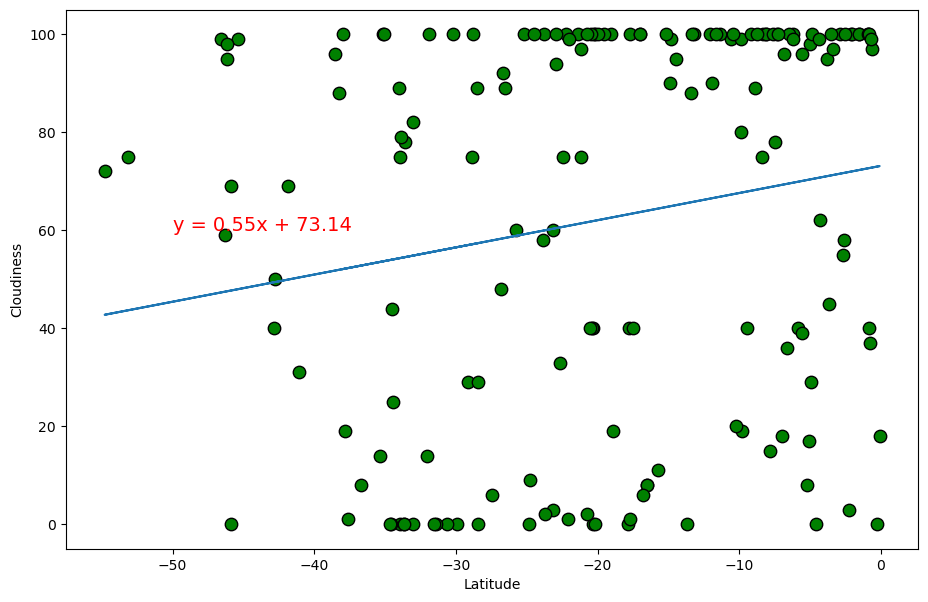

In [53]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness",(-50,60))

**Discussion about the linear relationship:** The relationship between latitude and cloudiness for the Northern and Southern Hemispheres is low to moderately positive. Latitude does not seem to predict cloudiness.  But there is greater cloudiness on the southern region of the equator vs. that of the northern region. 

### Wind Speed vs. Latitude Linear Regression Plot

The r value is 0.11


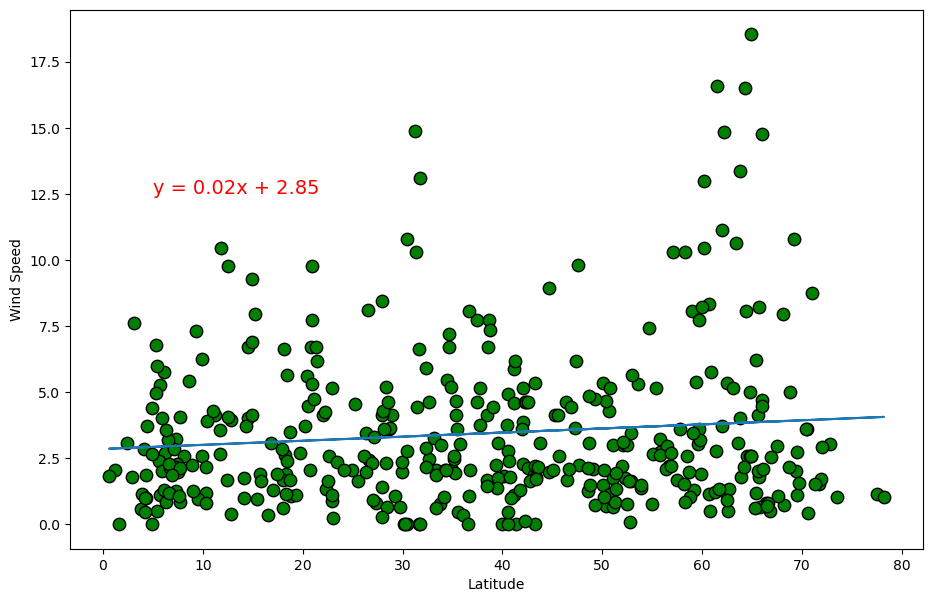

In [54]:
# Northern Hemisphere
lin_regress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed",(5,12.5))

The r value is -0.35


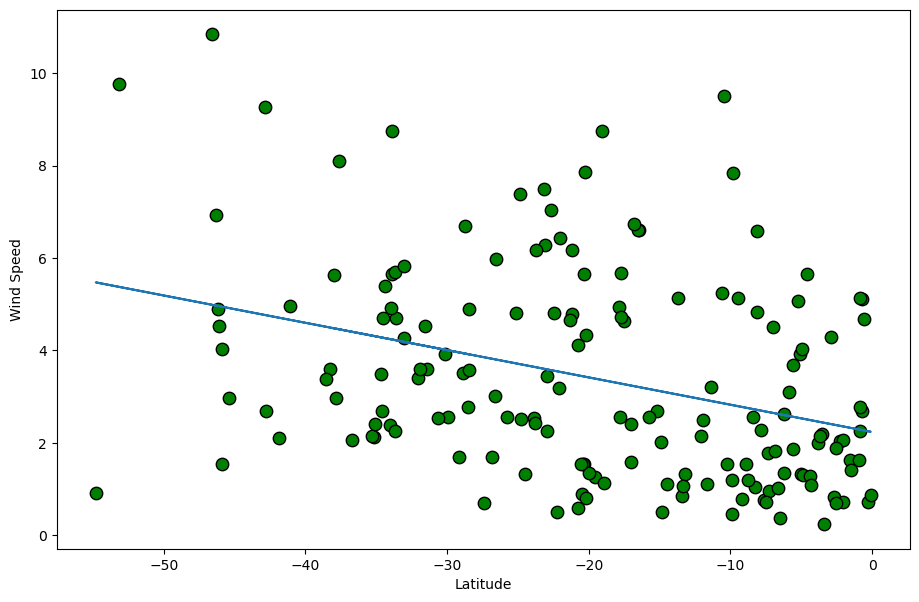

In [55]:
# Southern Hemisphere
lin_regress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed",(-50,12.5))

**Discussion about the linear relationship:** There is no relationship between latitude and wind speed present in the Northern Hemisphere. There is, however, a slight weak negative relationship in the Southern Hemisphere. The closer you travel toward the equator in the Southern Hemisphere, the lower the wind speeds are. Both hemispheres reflect tremendously low predictive indications for latitude and wind speeds. 